# Dataset 1

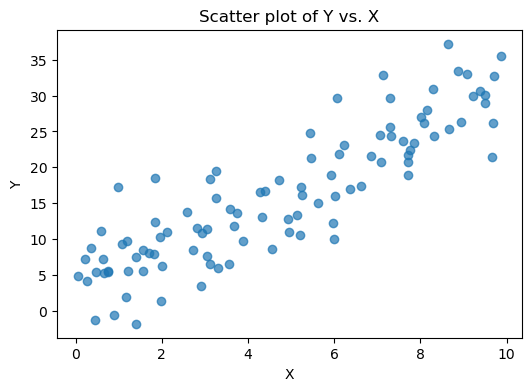

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     326.7
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           5.66e-33
Time:                        11:26:10   Log-Likelihood:                -292.09
No. Observations:                 100   AIC:                             588.2
Df Residuals:                      98   BIC:                             593.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0755      0.851      3.612      0.0

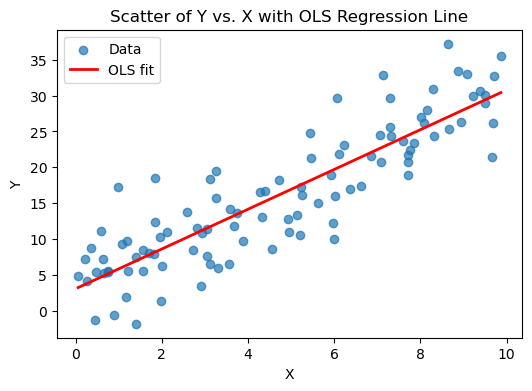

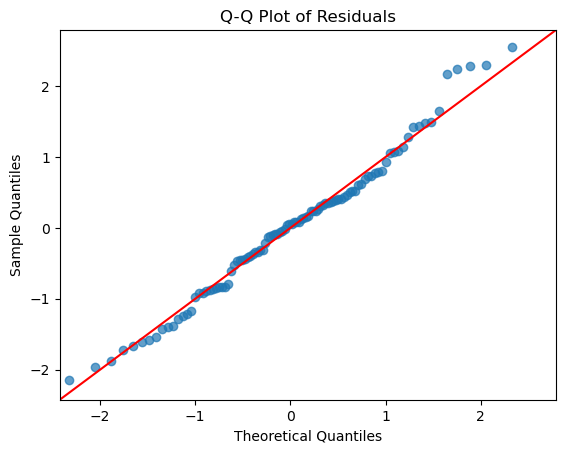

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### STEP 1 ####

#Import dataset 1
df_1 = pd.read_csv("data/dataset_1.csv")

#Scatter plot for dataset 1
plt.figure(figsize=(6,4))
plt.scatter(df_1['X'], df_1['Y'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs. X')
plt.show()

#OLS Regression
x_sm = sm.add_constant(df_1['X'])     
model_1 = sm.OLS(df_1['Y'], x_sm).fit()
print(model_1.summary())

#OLS on scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df_1['X'], df_1['Y'], alpha=0.7, label='Data')
x_vals = np.linspace(df_1['X'].min(), df_1['X'].max(), 100)
y_vals = model_1.params['const'] + model_1.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line')
plt.legend()
plt.show()

#### STEP 2 ####

#Extract residuals
resid = model_1.resid
n = len(resid)
sorted_resid = np.sort(resid)

#Q‑Q plot
sm.qqplot(resid, line='45', fit=True, alpha=0.7)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [2]:
#### STEP 3-4 ####
#Bootstrap 95% CIs for intercept & slope
n_boot = 1000
boot_params = np.zeros((n_boot, 2))   

for i in range(n_boot):
    idx = np.random.choice(df_1.index, size=n, replace=True)
    Xb  = sm.add_constant(df_1.loc[idx, 'X'])
    yb  = df_1.loc[idx, 'Y']
    res = sm.OLS(yb, Xb).fit()
    boot_params[i] = res.params.values


ci_int = np.percentile(boot_params[:,0], [2.5, 97.5])
ci_slope = np.percentile(boot_params[:,1], [2.5, 97.5])

print(f"95% CI for intercept: {ci_int}")
print(f"95% CI for slope:     {ci_slope}")

95% CI for intercept: [1.48446383 4.71217396]
95% CI for slope:     [2.46020406 3.04970442]


#### Dataset 1 - Association Verdict (STEP 5)
**There is an association since the 95% CI for slope does not include 0**

# Dataset 2

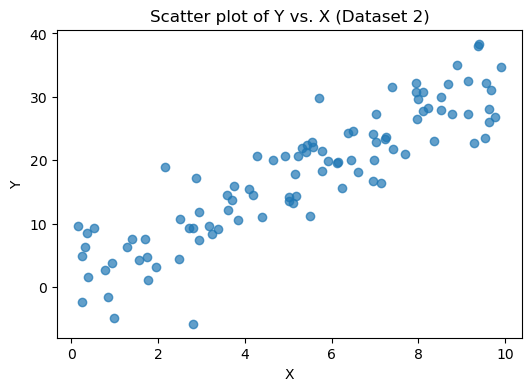

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     398.2
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           2.71e-36
Time:                        11:26:12   Log-Likelihood:                -291.36
No. Observations:                 100   AIC:                             586.7
Df Residuals:                      98   BIC:                             591.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3251      0.945      1.402      0.1

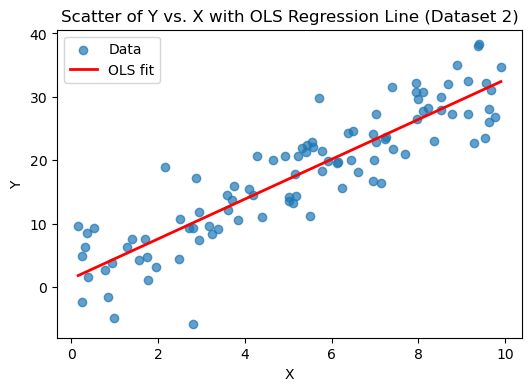

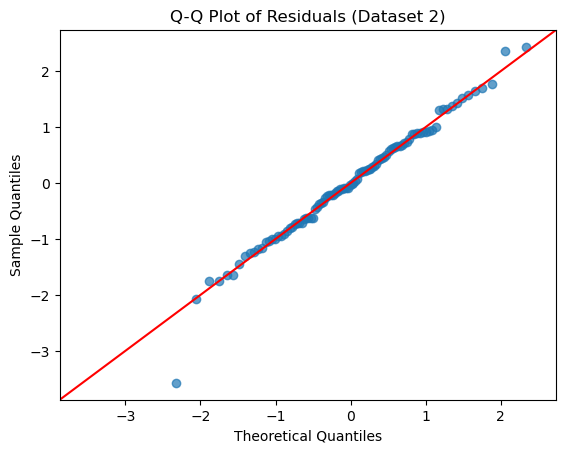

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### STEP 1 ####

#Import dataset 2
df_2 = pd.read_csv("data/dataset_2.csv")

#Scatter plot for dataset 2
plt.figure(figsize=(6,4))
plt.scatter(df_2['X'], df_2['Y'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs. X (Dataset 2)')
plt.show()

#OLS Regression
x_sm = sm.add_constant(df_2['X'])     
model_2 = sm.OLS(df_2['Y'], x_sm).fit()
print(model_2.summary())

#OLS on scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df_2['X'], df_2['Y'], alpha=0.7, label='Data')
x_vals = np.linspace(df_2['X'].min(), df_2['X'].max(), 100)
y_vals = model_2.params['const'] + model_2.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line (Dataset 2)')
plt.legend()
plt.show()

#### STEP 2 ####

#Extract residuals
resid = model_2.resid
n = len(resid)
sorted_resid = np.sort(resid)

#Q‑Q plot
sm.qqplot(resid, line='45', fit=True, alpha=0.7)
plt.title("Q-Q Plot of Residuals (Dataset 2)")
plt.show()

In [4]:
#### STEP 3-4 ####
#Bootstrap 95% CIs for intercept & slope
n_boot = 1000
boot_params = np.zeros((n_boot, 2))   

for i in range(n_boot):
    idx = np.random.choice(df_2.index, size=n, replace=True)
    Xb  = sm.add_constant(df_2.loc[idx, 'X'])
    yb  = df_2.loc[idx, 'Y']
    res = sm.OLS(yb, Xb).fit()
    boot_params[i] = res.params.values


ci_int = np.percentile(boot_params[:,0], [2.5, 97.5])
ci_slope = np.percentile(boot_params[:,1], [2.5, 97.5])

print(f"95% CI for intercept: {ci_int}")
print(f"95% CI for slope:     {ci_slope}")

95% CI for intercept: [-0.90042764  3.32116942]
95% CI for slope:     [2.80488637 3.47839667]


#### Dataset 2 - Association Verdict (STEP 5)
**There is an association since the 95% CI for slope does not include 0**

# Dataset 3

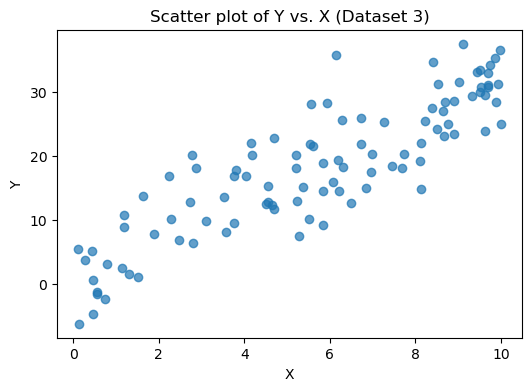

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     306.8
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           6.04e-32
Time:                        11:26:13   Log-Likelihood:                -304.77
No. Observations:                 100   AIC:                             613.5
Df Residuals:                      98   BIC:                             618.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6013      1.087      1.474      0.1

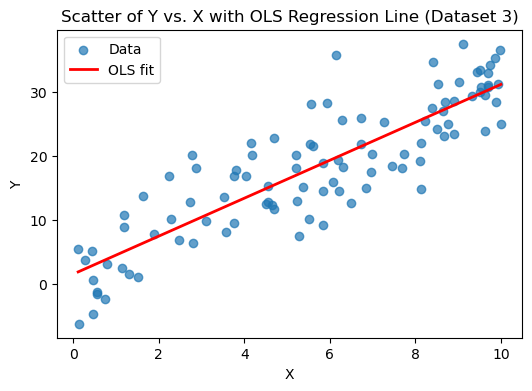

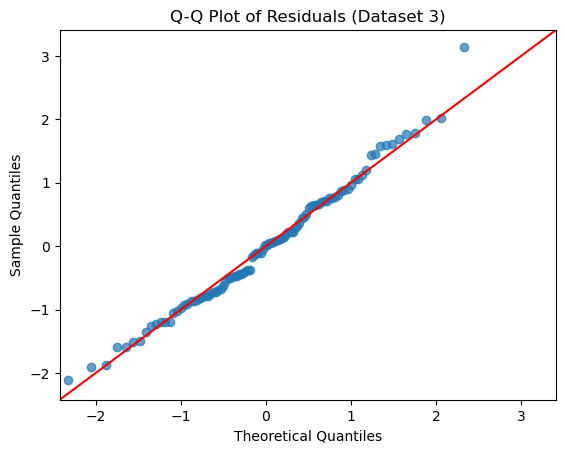

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### STEP 1 ####

#Import dataset 3
df_3 = pd.read_csv("data/dataset_3.csv")

#Scatter plot for dataset 3
plt.figure(figsize=(6,4))
plt.scatter(df_3['X'], df_3['Y'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs. X (Dataset 3)')
plt.show()

#OLS Regression
x_sm = sm.add_constant(df_3['X'])     
model_3 = sm.OLS(df_3['Y'], x_sm).fit()
print(model_3.summary())

#OLS on scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df_3['X'], df_3['Y'], alpha=0.7, label='Data')
x_vals = np.linspace(df_3['X'].min(), df_3['X'].max(), 100)
y_vals = model_3.params['const'] + model_3.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line (Dataset 3)')
plt.legend()
plt.show()

#### STEP 2 ####

#Extract residuals
resid = model_3.resid
n = len(resid)
sorted_resid = np.sort(resid)

#Q‑Q plot
sm.qqplot(resid, line='45', fit=True, alpha=0.7)
plt.title("Q-Q Plot of Residuals (Dataset 3)")
plt.show()

In [6]:
#### STEP 3-4 ####
#Bootstrap 95% CIs for intercept & slope
n_boot = 1000
boot_params = np.zeros((n_boot, 2))   

for i in range(n_boot):
    idx = np.random.choice(df_3.index, size=n, replace=True)
    Xb  = sm.add_constant(df_3.loc[idx, 'X'])
    yb  = df_3.loc[idx, 'Y']
    res = sm.OLS(yb, Xb).fit()
    boot_params[i] = res.params.values


ci_int = np.percentile(boot_params[:,0], [2.5, 97.5])
ci_slope = np.percentile(boot_params[:,1], [2.5, 97.5])

print(f"95% CI for intercept: {ci_int}")
print(f"95% CI for slope:     {ci_slope}")

95% CI for intercept: [-0.32655069  3.75846691]
95% CI for slope:     [2.65155264 3.24103017]


#### Dataset 3 - Association Verdict (STEP 5)
**There is an association since the 95% CI for slope does not include 0**

# Dataset 4

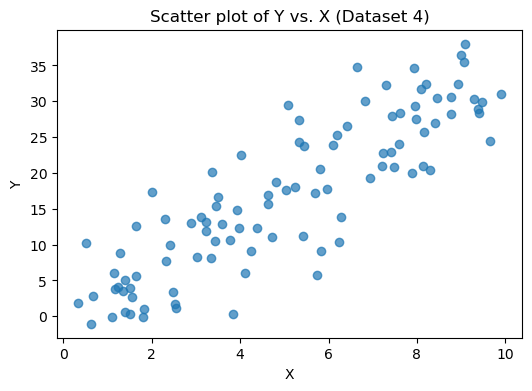

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     297.7
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.84e-31
Time:                        11:26:15   Log-Likelihood:                -308.43
No. Observations:                 100   AIC:                             620.9
Df Residuals:                      98   BIC:                             626.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0654      1.118      0.059      0.9

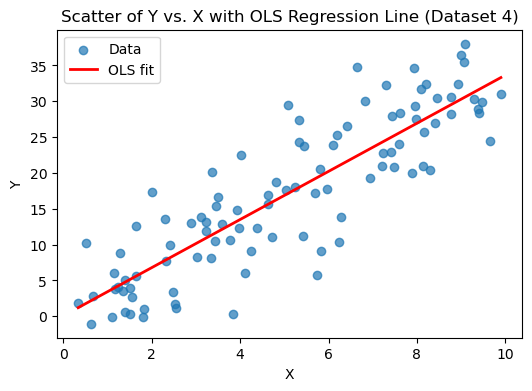

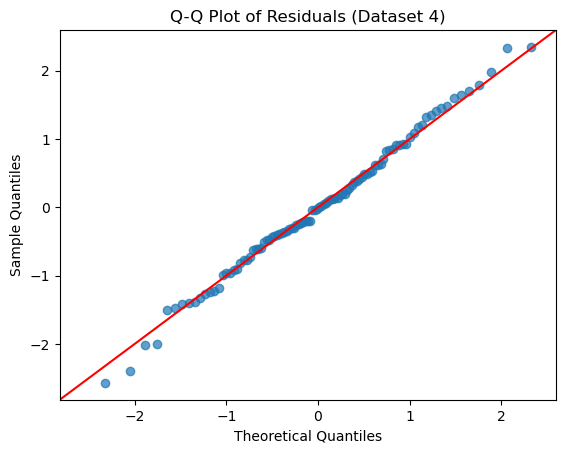

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### STEP 1 ####

#Import dataset 4
df_4 = pd.read_csv("data/dataset_4.csv")

#Scatter plot for dataset 4
plt.figure(figsize=(6,4))
plt.scatter(df_4['X'], df_4['Y'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs. X (Dataset 4)')
plt.show()

#OLS Regression
x_sm = sm.add_constant(df_4['X'])     
model_4 = sm.OLS(df_4['Y'], x_sm).fit()
print(model_4.summary())

#OLS on scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df_4['X'], df_4['Y'], alpha=0.7, label='Data')
x_vals = np.linspace(df_4['X'].min(), df_4['X'].max(), 100)
y_vals = model_4.params['const'] + model_4.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line (Dataset 4)')
plt.legend()
plt.show()

#### STEP 2 ####

#Extract residuals
resid = model_4.resid
n = len(resid)
sorted_resid = np.sort(resid)

#Q‑Q plot
sm.qqplot(resid, line='45', fit=True, alpha=0.7)
plt.title("Q-Q Plot of Residuals (Dataset 4)")
plt.show()

In [8]:
#### STEP 3-4 ####
#Bootstrap 95% CIs for intercept & slope
n_boot = 1000
boot_params = np.zeros((n_boot, 2))   

for i in range(n_boot):
    idx = np.random.choice(df_4.index, size=n, replace=True)
    Xb  = sm.add_constant(df_4.loc[idx, 'X'])
    yb  = df_4.loc[idx, 'Y']
    res = sm.OLS(yb, Xb).fit()
    boot_params[i] = res.params.values


ci_int = np.percentile(boot_params[:,0], [2.5, 97.5])
ci_slope = np.percentile(boot_params[:,1], [2.5, 97.5])

print(f"95% CI for intercept: {ci_int}")
print(f"95% CI for slope:     {ci_slope}")

95% CI for intercept: [-1.91952829  1.75240224]
95% CI for slope:     [3.03345253 3.68889091]


#### Dataset 4 - Association Verdict (STEP 5)
**There is an association since the 95% CI for slope does not include 0**

# Dataset 5

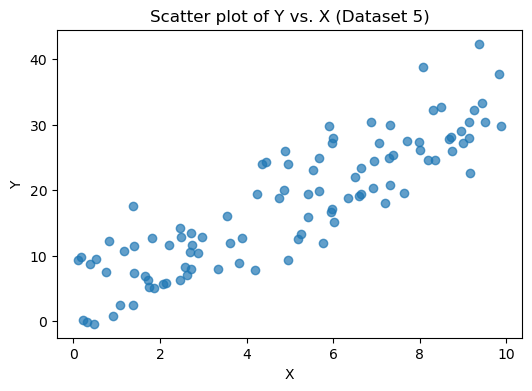

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     333.2
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           2.70e-33
Time:                        11:26:16   Log-Likelihood:                -295.23
No. Observations:                 100   AIC:                             594.5
Df Residuals:                      98   BIC:                             599.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2593      0.929      3.507      0.0

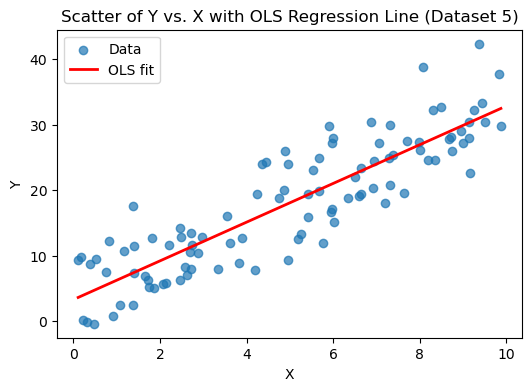

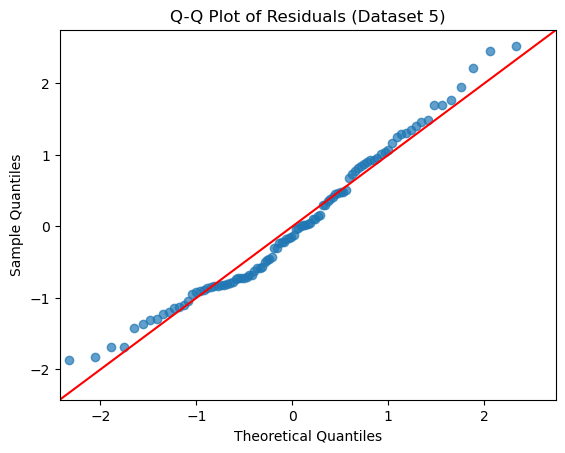

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### STEP 1 ####

#Import dataset 5
df_5 = pd.read_csv("data/dataset_5.csv")

#Scatter plot for dataset 5
plt.figure(figsize=(6,4))
plt.scatter(df_5['X'], df_5['Y'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs. X (Dataset 5)')
plt.show()

#OLS Regression
x_sm = sm.add_constant(df_5['X'])     
model_5 = sm.OLS(df_5['Y'], x_sm).fit()
print(model_5.summary())

#OLS on scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df_5['X'], df_5['Y'], alpha=0.7, label='Data')
x_vals = np.linspace(df_5['X'].min(), df_5['X'].max(), 100)
y_vals = model_5.params['const'] + model_5.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line (Dataset 5)')
plt.legend()
plt.show()

#### STEP 2 ####

#Extract residuals
resid = model_5.resid
n = len(resid)
sorted_resid = np.sort(resid)

#Q‑Q plot
sm.qqplot(resid, line='45', fit=True, alpha=0.7)
plt.title("Q-Q Plot of Residuals (Dataset 5)")
plt.show()

In [10]:
#### STEP 3-4 ####
#Bootstrap 95% CIs for intercept & slope
n_boot = 1000
boot_params = np.zeros((n_boot, 2))   

for i in range(n_boot):
    idx = np.random.choice(df_5.index, size=n, replace=True)
    Xb  = sm.add_constant(df_5.loc[idx, 'X'])
    yb  = df_5.loc[idx, 'Y']
    res = sm.OLS(yb, Xb).fit()
    boot_params[i] = res.params.values


ci_int = np.percentile(boot_params[:,0], [2.5, 97.5])
ci_slope = np.percentile(boot_params[:,1], [2.5, 97.5])

print(f"95% CI for intercept: {ci_int}")
print(f"95% CI for slope:     {ci_slope}")

95% CI for intercept: [1.62189849 4.94212388]
95% CI for slope:     [2.66133417 3.25365885]


#### Dataset 5 - Association Verdict (STEP 5)
**There is an association since the 95% CI for slope does not include 0**

# Dataset 6

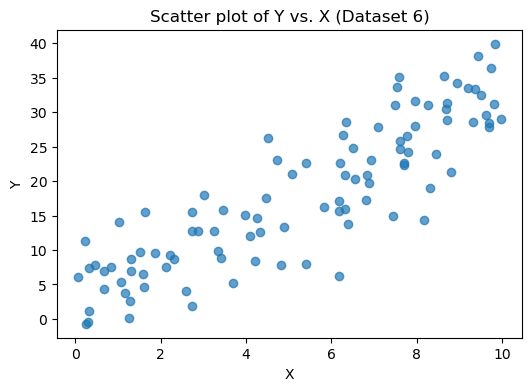

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     310.2
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           3.99e-32
Time:                        11:26:18   Log-Likelihood:                -304.71
No. Observations:                 100   AIC:                             613.4
Df Residuals:                      98   BIC:                             618.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5146      1.019      2.467      0.0

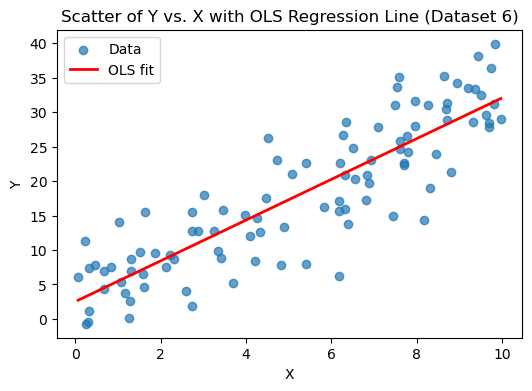

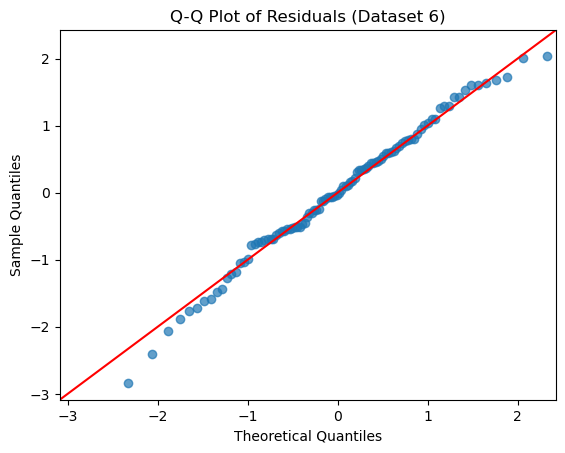

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### STEP 1 ####

#Import dataset 6
df_6 = pd.read_csv("data/dataset_6.csv")

#Scatter plot for dataset 6
plt.figure(figsize=(6,4))
plt.scatter(df_6['X'], df_6['Y'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs. X (Dataset 6)')
plt.show()

#OLS Regression
x_sm = sm.add_constant(df_6['X'])     
model_6 = sm.OLS(df_6['Y'], x_sm).fit()
print(model_6.summary())

#OLS on scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df_6['X'], df_6['Y'], alpha=0.7, label='Data')
x_vals = np.linspace(df_6['X'].min(), df_6['X'].max(), 100)
y_vals = model_6.params['const'] + model_6.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line (Dataset 6)')
plt.legend()
plt.show()

#### STEP 2 ####

#Extract residuals
resid = model_6.resid
n = len(resid)
sorted_resid = np.sort(resid)

#Q‑Q plot
sm.qqplot(resid, line='45', fit=True, alpha=0.7)
plt.title("Q-Q Plot of Residuals (Dataset 6)")
plt.show()

In [12]:
#### STEP 3-4 ####
#Bootstrap 95% CIs for intercept & slope
n_boot = 1000
boot_params = np.zeros((n_boot, 2))   

for i in range(n_boot):
    idx = np.random.choice(df_6.index, size=n, replace=True)
    Xb  = sm.add_constant(df_6.loc[idx, 'X'])
    yb  = df_6.loc[idx, 'Y']
    res = sm.OLS(yb, Xb).fit()
    boot_params[i] = res.params.values


ci_int = np.percentile(boot_params[:,0], [2.5, 97.5])
ci_slope = np.percentile(boot_params[:,1], [2.5, 97.5])

print(f"95% CI for intercept: {ci_int}")
print(f"95% CI for slope:     {ci_slope}")

95% CI for intercept: [0.7388902  4.30212757]
95% CI for slope:     [2.66359913 3.25683812]


In [13]:
#### STEP 3-4 ####
#Bootstrap 95% CIs for intercept & slope
n_boot = 1000
boot_params = np.zeros((n_boot, 2))   

for i in range(n_boot):
    idx = np.random.choice(df_6.index, size=n, replace=True)
    Xb  = sm.add_constant(df_6.loc[idx, 'X'])
    yb  = df_6.loc[idx, 'Y']
    res = sm.OLS(yb, Xb).fit()
    boot_params[i] = res.params.values


ci_int = np.percentile(boot_params[:,0], [2.5, 97.5])
ci_slope = np.percentile(boot_params[:,1], [2.5, 97.5])

print(f"95% CI for intercept: {ci_int}")
print(f"95% CI for slope:     {ci_slope}")

95% CI for intercept: [0.65651904 4.18857373]
95% CI for slope:     [2.67154576 3.25244134]


#### Dataset 6 - Association Verdict (STEP 5)
**There is an association since the 95% CI for slope does not include 0**

# Dataset 7

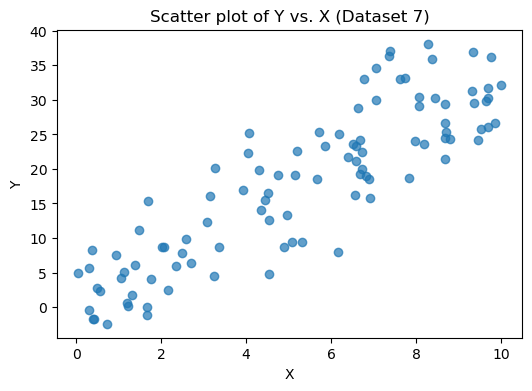

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     317.5
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.66e-32
Time:                        11:26:20   Log-Likelihood:                -310.79
No. Observations:                 100   AIC:                             625.6
Df Residuals:                      98   BIC:                             630.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8400      1.101      0.763      0.4

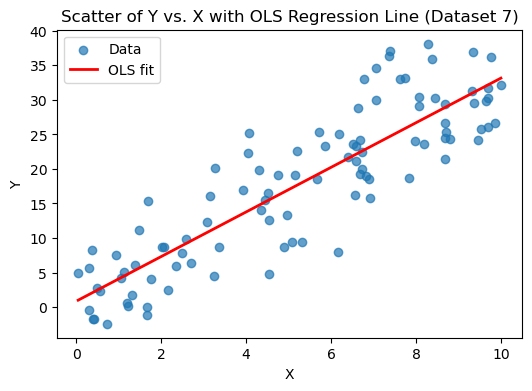

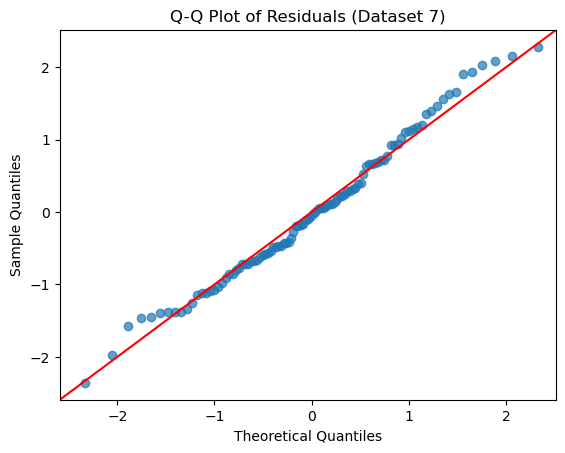

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### STEP 1 ####

#Import dataset 7
df_7 = pd.read_csv("data/dataset_7.csv")

#Scatter plot for dataset 7
plt.figure(figsize=(6,4))
plt.scatter(df_7['X'], df_7['Y'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs. X (Dataset 7)')
plt.show()

#OLS Regression
x_sm = sm.add_constant(df_7['X'])     
model_7 = sm.OLS(df_7['Y'], x_sm).fit()
print(model_7.summary())

#OLS on scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df_7['X'], df_7['Y'], alpha=0.7, label='Data')
x_vals = np.linspace(df_7['X'].min(), df_7['X'].max(), 100)
y_vals = model_7.params['const'] + model_7.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line (Dataset 7)')
plt.legend()
plt.show()

#### STEP 2 ####

#Extract residuals
resid = model_7.resid
n = len(resid)
sorted_resid = np.sort(resid)

#Q‑Q plot
sm.qqplot(resid, line='45', fit=True, alpha=0.7)
plt.title("Q-Q Plot of Residuals (Dataset 7)")
plt.show()

In [15]:
#### STEP 3-4 ####
#Bootstrap 95% CIs for intercept & slope
n_boot = 1000
boot_params = np.zeros((n_boot, 2))   

for i in range(n_boot):
    idx = np.random.choice(df_7.index, size=n, replace=True)
    Xb  = sm.add_constant(df_7.loc[idx, 'X'])
    yb  = df_7.loc[idx, 'Y']
    res = sm.OLS(yb, Xb).fit()
    boot_params[i] = res.params.values


ci_int = np.percentile(boot_params[:,0], [2.5, 97.5])
ci_slope = np.percentile(boot_params[:,1], [2.5, 97.5])

print(f"95% CI for intercept: {ci_int}")
print(f"95% CI for slope:     {ci_slope}")

95% CI for intercept: [-0.82327811  2.56862319]
95% CI for slope:     [2.92581737 3.54174309]


#### Dataset 7 - Association Verdict (STEP 5)
**There is an association since the 95% CI for slope does not include 0**

# Dataset 8

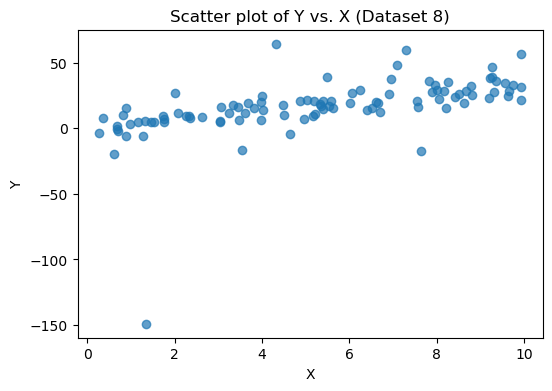

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     40.03
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           7.51e-09
Time:                        11:26:22   Log-Likelihood:                -435.28
No. Observations:                 100   AIC:                             874.6
Df Residuals:                      98   BIC:                             879.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0159      3.890     -1.290      0.2

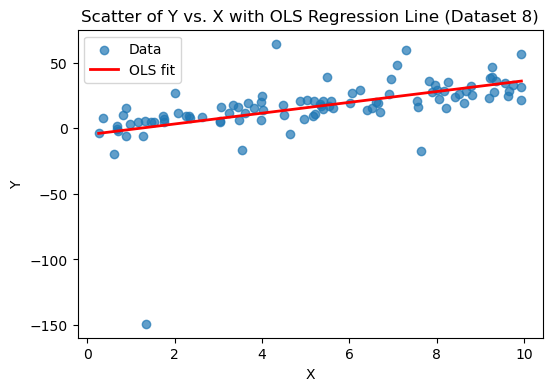

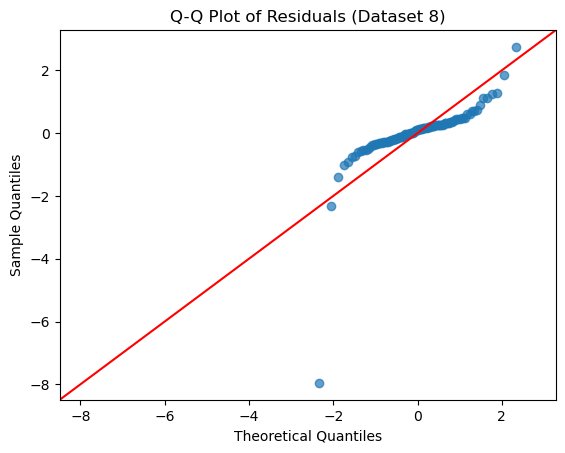

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### STEP 1 ####

#Import dataset 8
df_8 = pd.read_csv("data/dataset_8.csv")

#Scatter plot for dataset 8
plt.figure(figsize=(6,4))
plt.scatter(df_8['X'], df_8['Y'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs. X (Dataset 8)')
plt.show()

#OLS Regression
x_sm = sm.add_constant(df_8['X'])     
model_8 = sm.OLS(df_8['Y'], x_sm).fit()
print(model_8.summary())

#OLS on scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df_8['X'], df_8['Y'], alpha=0.7, label='Data')
x_vals = np.linspace(df_8['X'].min(), df_8['X'].max(), 100)
y_vals = model_8.params['const'] + model_8.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line (Dataset 8)')
plt.legend()
plt.show()

#### STEP 2 ####

#Extract residuals
resid = model_8.resid
n = len(resid)
sorted_resid = np.sort(resid)

#Q‑Q plot
sm.qqplot(resid, line='45', fit=True, alpha=0.7)
plt.title("Q-Q Plot of Residuals (Dataset 8)")
plt.show()

##### STEP 3: Poor fit - no further inference

# Dataset 9

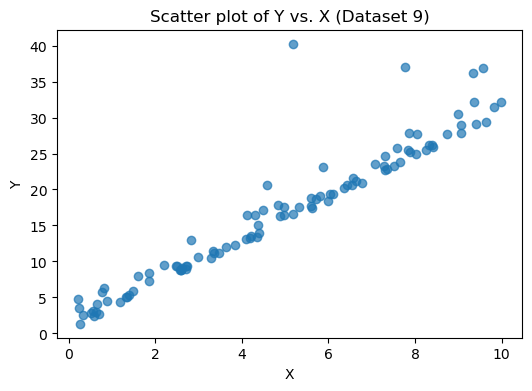

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     898.5
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           3.74e-51
Time:                        11:26:22   Log-Likelihood:                -249.53
No. Observations:                 100   AIC:                             503.1
Df Residuals:                      98   BIC:                             508.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6723      0.584      2.863      0.0

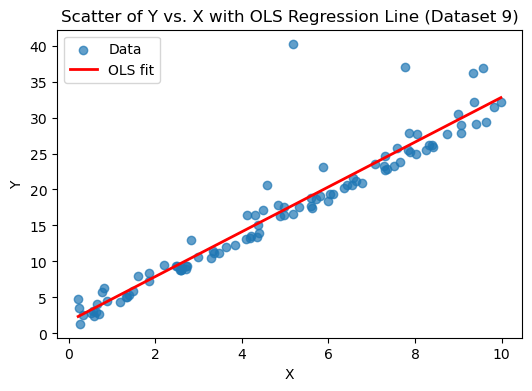

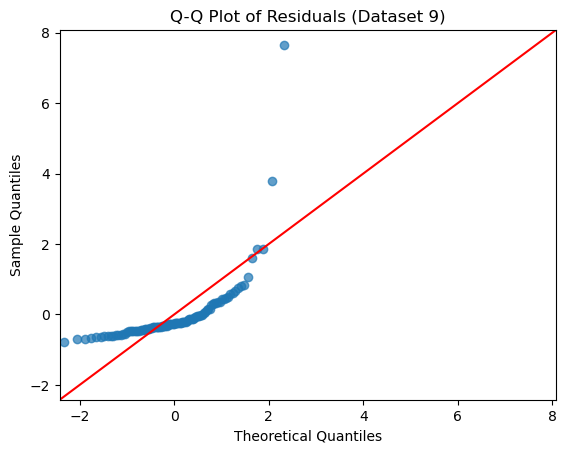

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### STEP 1 ####

#Import dataset 9
df_9 = pd.read_csv("data/dataset_9.csv")

#Scatter plot for dataset 9
plt.figure(figsize=(6,4))
plt.scatter(df_9['X'], df_9['Y'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs. X (Dataset 9)')
plt.show()

#OLS Regression
x_sm = sm.add_constant(df_9['X'])     
model_9 = sm.OLS(df_9['Y'], x_sm).fit()
print(model_9.summary())

#OLS on scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df_9['X'], df_9['Y'], alpha=0.7, label='Data')
x_vals = np.linspace(df_9['X'].min(), df_9['X'].max(), 100)
y_vals = model_9.params['const'] + model_9.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line (Dataset 9)')
plt.legend()
plt.show()

#### STEP 2 ####

#Extract residuals
resid = model_9.resid
n = len(resid)
sorted_resid = np.sort(resid)

#Q‑Q plot
sm.qqplot(resid, line='45', fit=True, alpha=0.7)
plt.title("Q-Q Plot of Residuals (Dataset 9)")
plt.show()

##### STEP 3: Poor fit - no further inference

# Dataset 10

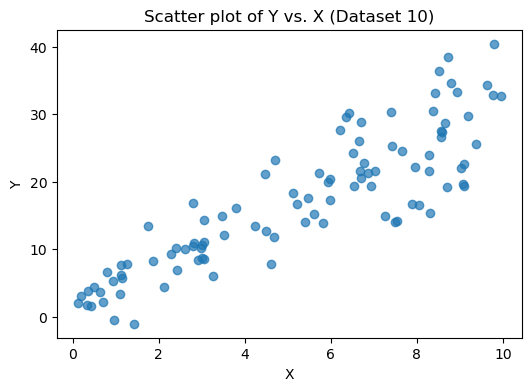

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     320.6
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.16e-32
Time:                        11:26:23   Log-Likelihood:                -297.79
No. Observations:                 100   AIC:                             599.6
Df Residuals:                      98   BIC:                             604.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9966      0.973      2.051      0.0

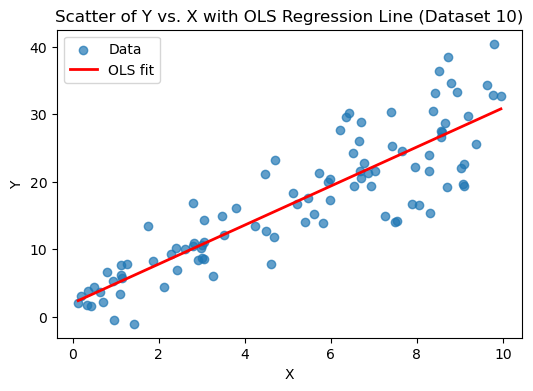

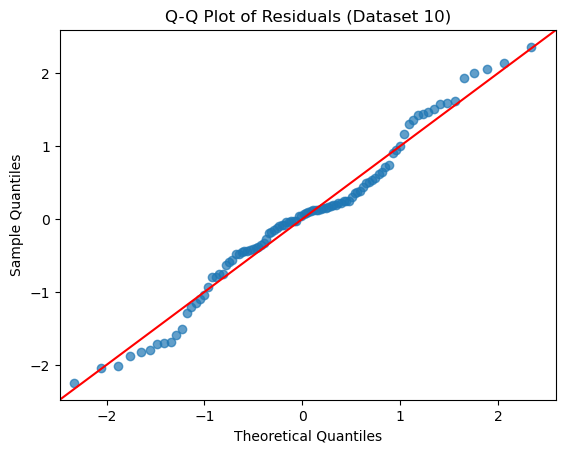

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### STEP 1 ####

#Import dataset 10
df_10 = pd.read_csv("data/dataset_10.csv")

#Scatter plot for dataset 10
plt.figure(figsize=(6,4))
plt.scatter(df_10['X'], df_10['Y'], alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of Y vs. X (Dataset 10)')
plt.show()

#OLS Regression
x_sm = sm.add_constant(df_10['X'])     
model_10 = sm.OLS(df_10['Y'], x_sm).fit()
print(model_10.summary())

#OLS on scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df_10['X'], df_10['Y'], alpha=0.7, label='Data')
x_vals = np.linspace(df_10['X'].min(), df_10['X'].max(), 100)
y_vals = model_10.params['const'] + model_10.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='OLS fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line (Dataset 10)')
plt.legend()
plt.show()

#### STEP 2 ####

#Extract residuals
resid = model_10.resid
n = len(resid)
sorted_resid = np.sort(resid)

#Q‑Q plot
sm.qqplot(resid, line='45', fit=True, alpha=0.7)
plt.title("Q-Q Plot of Residuals (Dataset 10)")
plt.show()

##### STEP 3: Poor fit - no further inference